### 相关性矩阵图

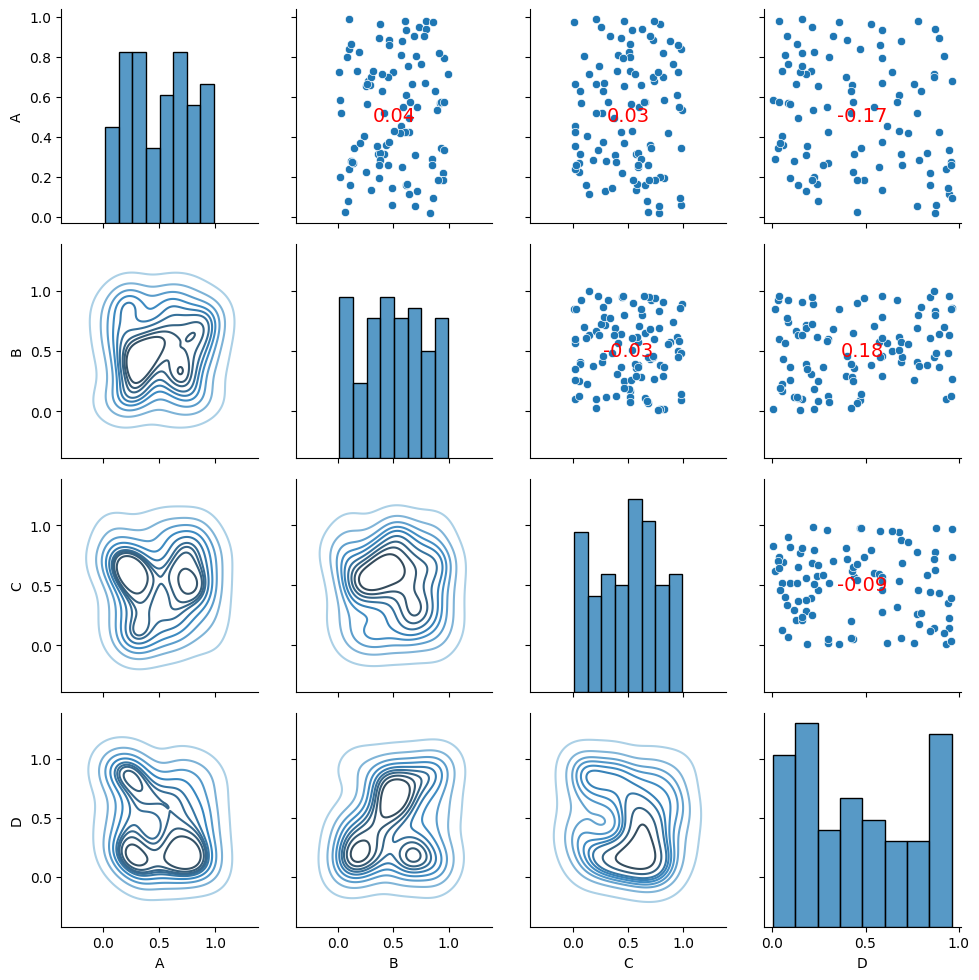

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 示例数据
np.random.seed(0)
data = pd.DataFrame(np.random.rand(100, 4), columns=['A', 'B', 'C', 'D'])

# 绘制相关性矩阵和散点图
def correlation_plot(x, y, **kwargs):
    corr = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f'{corr:.2f}', xy=(.5, .5), xycoords=ax.transAxes, ha='center', va='center', fontsize=14, color='red')

g = sns.PairGrid(data)
g.map_upper(sns.scatterplot)    # 上三角绘制散点图
g.map_lower(sns.kdeplot, cmap="Blues_d")  # 下三角绘制密度图
g.map_diag(sns.histplot, kde_kws={'color': 'blue'})  # 对角线绘制直方图

# 在右上角添加相关性系数
g.map_upper(correlation_plot)

plt.show()


未归一化的互信息: 1.9927493402614438
归一化的互信息: 1.0


d:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


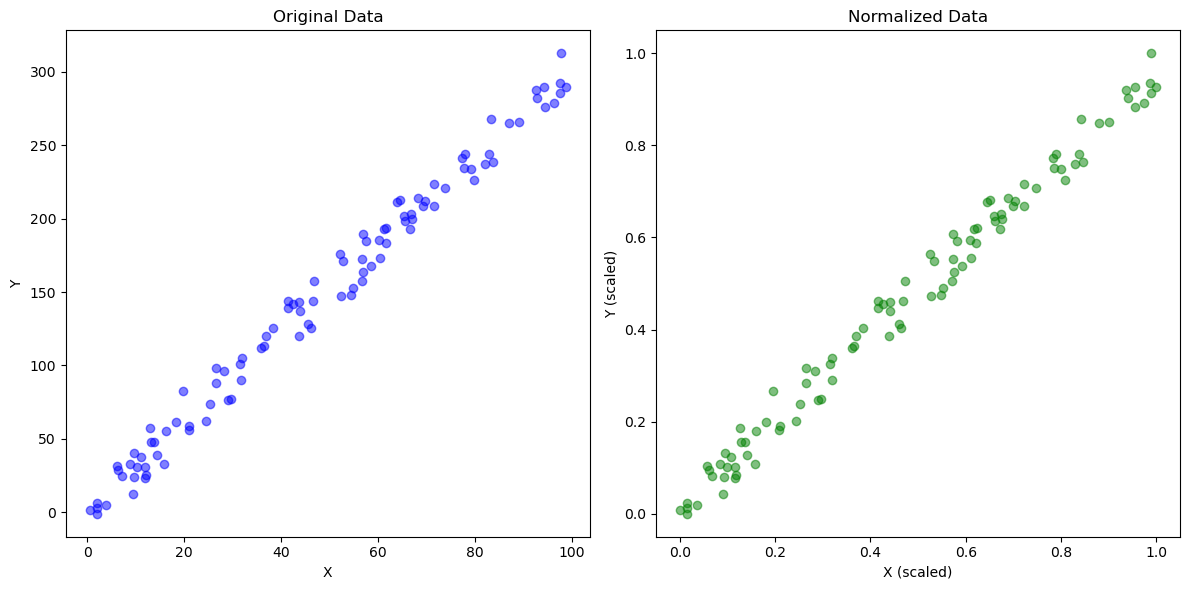

: 

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.feature_selection import mutual_info_regression  
from sklearn.metrics import normalized_mutual_info_score  
from sklearn.preprocessing import MinMaxScaler  

# 生成示例数据  
np.random.seed(0)  
X = np.random.rand(100, 1) * 100  # 变量 X  
Y = 3 * X + np.random.normal(0, 10, (100, 1))  # 变量 Y  

# 计算未归一化的互信息  
mi = mutual_info_regression(X, Y.ravel())  
print(f"未归一化的互信息: {mi[0]}")  

# 归一化处理  
scaler = MinMaxScaler()  
X_scaled = scaler.fit_transform(X)  
Y_scaled = scaler.fit_transform(Y)  

# 计算归一化的互信息  
nmi = normalized_mutual_info_score(X_scaled.ravel(), Y_scaled.ravel())  
print(f"归一化的互信息: {nmi}")  

# 可视化数据和互信息  
plt.figure(figsize=(12, 6))  

# 原始数据  
plt.subplot(1, 2, 1)  
plt.scatter(X, Y, color='blue', alpha=0.5)  
plt.title('Original Data')  
plt.xlabel('X')  
plt.ylabel('Y')  

# 归一化数据  
plt.subplot(1, 2, 2)  
plt.scatter(X_scaled, Y_scaled, color='green', alpha=0.5)  
plt.title('Normalized Data')  
plt.xlabel('X (scaled)')  
plt.ylabel('Y (scaled)')  

plt.tight_layout()  
plt.show()